# [Waves and Waveforms](https://www.audiolabs-erlangen.de/resources/MIR/FMP/C1/C1S3_Waveform.html)


In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

In [5]:
import plotly
print(plotly.__version__)

5.1.0


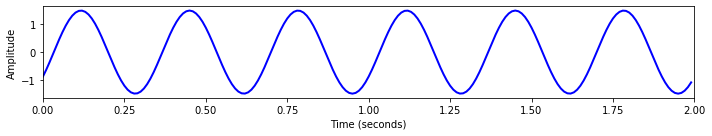

In [3]:
# Waveform of Sinusoid

Fs = 100
duration = 2
amplitude = 1.5
phase = 0.1
frequency = 3

num_samples = int(Fs * duration)
t = np.arange(num_samples) / Fs
x = amplitude * np.sin(2 * np.pi * (frequency * t - phase))

plt.figure(figsize=(10,2))
plt.plot(t, x, color='blue', linewidth=2.0, linestyle='-')
plt.xlim([0, duration])
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.tight_layout()

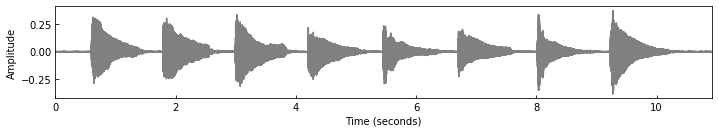

In [7]:
# Waveform of Real Audio Example
import librosa

Fs = 11020
Fn = 'FMP/data/C1/FMP_C1_Scale-Cmajor_Piano.wav'
x, Fs = librosa.load(Fn, sr=Fs)
t = np.arange(x.shape[0]) / Fs

plt.figure(figsize=(10, 2))
plt.plot(t, x, color='gray')
plt.xlim([t[0],  t[-1]])
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.tick_params(direction='in') # 軸を目盛を内側のみにつける
plt.tight_layout()


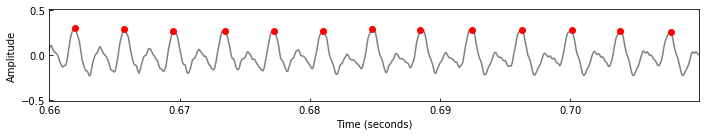

In [12]:
time_start = 0.66
time_end = 0.71
index_start = int(np.round(Fs*time_start))
index_end = int(np.round(Fs*time_end))
x_crop = x[index_start:index_end]
t_crop = t[index_start:index_end]

peaks = librosa.util.peak_pick(x_crop, 25, 25, 25, 25, 0.1, 10)

plt.figure(figsize=(10, 2))
plt.plot(t_crop, x_crop, color='gray')
plt.plot(t_crop[peaks], x_crop[peaks], 'ro')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.xlim([t_crop[0], t_crop[-1]])
plt.ylim([-0.51, 0.51])
plt.tick_params(direction='in')
plt.tight_layout()


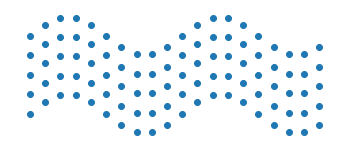

MovieWriter stderr:
dyld: Library not loaded: @rpath/libx264.138.dylib
  Referenced from: /Users/nagasaki/opt/miniconda3/envs/FMP/bin/ffmpeg
  Reason: image not found



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '432x180', '-pix_fmt', 'rgba', '-r', '20.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '../output/C1/FMP_C1_Wave_Transverse.mp4']' died with <Signals.SIGABRT: 6>.

In [13]:
import matplotlib.animation as animation


def create_grid_pos(x_size=5, y_size=5):
    # x_size: number of grid points in horizontal direction
    # y_size: number of grid points in vertical direction
    # x_pos: horizontal coordinates of grid points
    # y_pos: vertical coordinates of grid points
    x_pos = np.zeros((y_size, x_size))
    y_pos = np.zeros((y_size, x_size))

    for x in range(x_size):
        y_pos[:, x] = np.arange(y_size)

    for y in range(y_size):
        x_pos[y, :] = np.arange(x_size)

    return x_pos, y_pos


def transverse_wave(x_positions, y_positions, frames_per_cycle=20, wave_len=10, amplitude=1, phase=0, num_frames=100):
    # frames_per_cycle = number of frames per cycle
    # num_frames = frames to be generated
    k = 2 * np.pi / wave_len
    omega = 2 * np.pi / frames_per_cycle
    x_frames = np.zeros(
        (num_frames, x_positions.shape[0], x_positions.shape[1]))
    y_frames = np.zeros(
        (num_frames, y_positions.shape[0], y_positions.shape[1]))

    for t in range(num_frames):
        x_frames[t, :, :] = x_positions
        for x in range(x_positions.shape[1]):
            y_frames[t, :, x] = y_positions[:, x] + amplitude * \
                np.sin(k * x_positions[:, x] - omega * t + phase)

    return x_frames, y_frames


def longitudinal_wave(x_positions, y_positions, frames_per_cycle=20, wave_len=10,  amplitude=1, phase=0, num_frames=100):
    # frames_per_cycle = number of frames per cycle
    # num_frames = frames to be generated
    k = 2 * np.pi / wave_len
    omega = 2 * np.pi / frames_per_cycle
    x_frames = np.zeros(
        (num_frames, x_positions.shape[0], x_positions.shape[1]))
    y_frames = np.zeros(
        (num_frames, y_positions.shape[0], y_positions.shape[1]))

    for t in range(num_frames):
        y_frames[t, :, :] = y_positions
        for x in range(x_positions.shape[1]):
            x_frames[t, :, x] = x_positions[:, x] + amplitude * \
                np.sin(k * x_positions[:, x] - omega * t + phase)

    return x_frames, y_frames


def combined_wave(x_positions, y_positions, frames_per_cycle=20, wave_len=[10, 10], amplitude=[1, 1], phase=[0, 0], num_frames=100):
    x_trans, y_trans = transverse_wave(x_positions, y_positions, frames_per_cycle=frames_per_cycle,
                                       wave_len=wave_len[0], amplitude=amplitude[0], phase=phase[0], num_frames=num_frames)
    x_long, y_long = longitudinal_wave(x_positions, y_positions, frames_per_cycle=frames_per_cycle,
                                       wave_len=wave_len[1], amplitude=amplitude[1], phase=phase[1], num_frames=num_frames)
    x_comb = x_long
    y_comb = y_trans
    return x_comb, y_comb


x_size = 20
y_size = 5
x_pos, y_pos = create_grid_pos(x_size=x_size, y_size=y_size)

frames_per_cycle = 100
num_frames = 400
x_trans, y_trans = transverse_wave(x_pos, y_pos, frames_per_cycle=frames_per_cycle,
                                   wave_len=10, amplitude=1, num_frames=num_frames)
x_long, y_long = longitudinal_wave(x_pos, y_pos, frames_per_cycle=frames_per_cycle,
                                   wave_len=10, amplitude=1, num_frames=num_frames)
x_comb, y_comb = combined_wave(x_pos, y_pos, frames_per_cycle=frames_per_cycle,
                               wave_len=[10, 10], amplitude=[1, 0.9], phase=[0, np.pi/2+0.5], num_frames=num_frames)


def update(frame_num, scat, x, y):
    idx = frame_num % x.shape[0]
    scat.set_offsets(np.column_stack(
        (x[idx, :, :].flatten(), y[idx, :, :].flatten())))

    return scat


fig_trans, ax_trans = plt.subplots()
fig_trans.set_size_inches(6, 2.5)
plt.axis('off')
ax_trans.set_xlim([-1.5, x_size + 0.5])
ax_trans.set_ylim([-1.5, y_size + 0.5])
scat_trans = ax_trans.scatter(x_trans[0, :, :], y_trans[0, :, :])

# interval between two video frames (given in ms)
frames_per_seconds = 20
interval = 1000/frames_per_seconds
ani_trans = animation.FuncAnimation(fig_trans, update, frames=num_frames,
                                    fargs=(scat_trans, x_trans, y_trans), interval=interval)
plt.show()
ani_trans.save(os.path.join('..', 'output', 'C1',
               'FMP_C1_Wave_Transverse.mp4'))

fig_long, ax_long = plt.subplots()
fig_long.set_size_inches(6, 2.5)
plt.axis('off')
ax_long.set_xlim([-1.5, x_size + 0.5])
ax_long.set_ylim([-1.5, y_size + 0.5])
scat_long = ax_long.scatter(x_long[0, :, :], y_long[0, :, :])

ani_long = animation.FuncAnimation(fig_long, update, frames=num_frames,
                                   fargs=(scat_long, x_long, y_long), interval=interval)
plt.show()
ani_long.save(os.path.join('..', 'output', 'C1',
              'FMP_C1_Wave_Longitudinal.mp4'))

fig_comb, ax_comb = plt.subplots()
fig_comb.set_size_inches(6, 2.5)
plt.axis('off')
ax_comb.set_xlim([-1.5, x_size + 0.5])
ax_comb.set_ylim([-1.5, y_size + 0.5])
scat_comb = ax_comb.scatter(x_comb[0, :, :], y_comb[0, :, :])

ani_comb = animation.FuncAnimation(fig_comb, update, frames=num_frames,
                                   fargs=(scat_comb, x_comb, y_comb), interval=interval)
plt.show()
ani_comb.save(os.path.join('..', 'output', 'C1', 'FMP_C1_Wave_Combined.mp4'))
